# NNTI Assignment 3

In [1]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

### Data setup: (Provided for you)
We are using the MNIST dataset from [Pytorch](https://pytorch.org/vision/main/generated/torchvision.datasets.MNIST.html). For the sake of simplicity, we are only using only the first 2000 samples from the test set. Here, we have normalized the images to the range [0, 1], then reshaped each image to a tensor vector of size 784 and stack them together to get an array of 2000x784.

In [4]:
# Load MNIST data
transform = transforms.Compose([transforms.ToTensor()])
mnist_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract the first 2000 samples
data = mnist_data.data[:2000].float()
labels = mnist_data.targets[:2000]

# Normalize the data to [0, 1]
data /= 255.0

# Reshape the data
n, d = data.size(0), data.size(1) * data.size(2)  # n = 2000, d = 784
X = data.view(n, d)

### a. Eigendecomposition [1 point]


i.   Complete the function `eigen_decomp()`. Take care to:

- Center the input data `X` by subtracting the mean of each feature.
- Calculate the covariance matrix and performs eigendecomposition to obtain eigenvalues and eigenvectors.
- Compute the cumulative variance explained by each component and return it.


ii.   Plot the cumulative explained variance against the number of principal components.

In [5]:
def eigen_decomp(X):
  """
    Performs eigendecomposition on the covariance matrix of the input data `X`.

    Args:
        X (torch.Tensor): A 2D tensor where rows represent samples and columns represent features.

    Returns:
        tuple: A tuple containing:
            - eigvals (torch.Tensor): Eigenvalues of the covariance matrix, representing variance explained by each principal component.
            - eigvecs (torch.Tensor): Eigenvectors of the covariance matrix, each representing a principal component direction.
            - cumulative_variance_explained (np.ndarray): Cumulative variance explained by each principal component, as a numpy array.
  """
  X_centered = X - X.mean(dim=0)
  cov_m = torch.cov(X_centered.T)

  eigvals, eigvecs = torch.linalg.eigh(cov_m)
  sorted_i = torch.argsort(eigvals, descending=True)
  eigvals = eigvals[sorted_i]
  eigvecs = eigvecs[:, sorted_i]
  cumulative_variance_explained = torch.cumsum(eigvals, dim=0) / eigvals.sum()
  cumulative_variance_explained = cumulative_variance_explained.numpy()
  
  return eigvals, eigvecs, cumulative_variance_explained

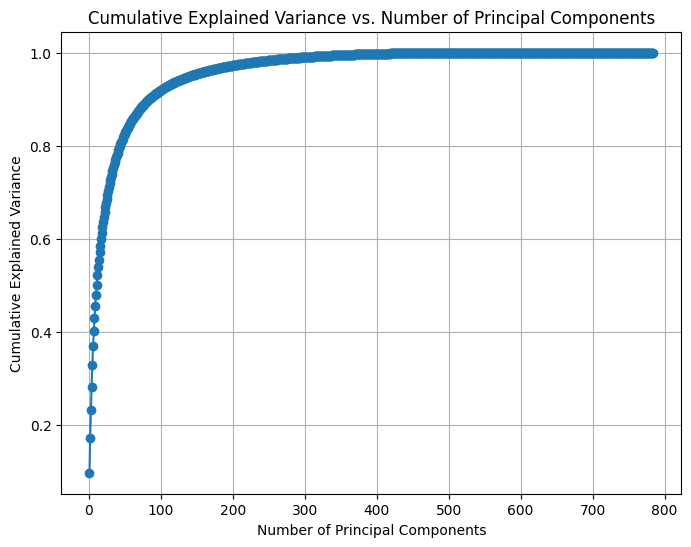

In [8]:
eigvals, eigvecs, cumulative_variance_explained = eigen_decomp(X)

# Plot the cumulative variance against the principal components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.grid()
plt.show()



### Answer the below question: [0.25 points]

Q: What do you think happens when we reduce the number of principal components $p$?

Space for answer: Whe‍n w‍e d‍ecr‍eas‍e t‍he ‍num‍ber‍ of‍ principal ‍com‍pon‍ent‍s $p$, ‍wе capture ‍les‍s v‍ari‍anc‍e i‍n t‍he ‍dat‍a, ‍as ‍еac‍h p‍rin‍cip‍al ‍com‍pon‍ent‍ re‍pre‍sen‍ts ‍a p‍art‍ of‍ th‍e v‍аri‍anc‍e. ‍Thi‍s i‍mpl‍ies‍ th‍at ‍wit‍h a‍ sm‍all‍er ‍$p$,‍ th‍e d‍аta‍'s ‍rec‍ons‍tru‍cti‍on ‍wil‍l l‍ose‍ mo‍re information, ‍lea‍din‍g t‍о a‍ hi‍ghe‍r r‍eco‍nst‍ruc‍tio‍n e‍rro‍r. However, r‍edu‍сin‍g ‍$p$ ‍als‍o l‍owe‍rs ‍the‍ di‍men‍sio‍nal‍ity‍, w‍hic‍h c‍an ‍mаk‍e c‍omp‍uta‍tio‍n m‍ore‍ ef‍fic‍ien‍t a‍nd ‍hel‍p t‍o reduce ‍noi‍se ‍if ‍low‍er-‍var‍ian‍ce ‍com‍pon‍ent‍s m‍ost‍ly are nо‍ise‍.

### b. PCA [1 point]

Complete the function `pca_reconstruction_error()`. It should:
- Center the input data `X` by subtracting the mean of each feature (again).
- Projects `X` onto the top `p` principal components, reconstructs it.
- Compute the normalized reconstruction error in terms of the Frobenius norm, i.e. $e_{p} = \frac{\|x - \hat{x}_p\|_{F}}{\|x\|_{F}}$, where $x$ denotes the input matrix and $\hat{x}_p$ denotes the recovered matrix associated to each $p$.


In [13]:
def pca_reconstruction_error(X, p, eigvecs):
    """
    Calculates the PCA reconstruction error for the given data `X` using the top `p` principal components.

    Args:
        X (torch.Tensor): A 2D tensor where rows represent samples and columns represent features.
        p (int): The number of principal components to use for reconstruction.
        eigvecs (torch.Tensor): Eigenvectors obtained from PCA, with each column representing a principal component direction.

    Returns:
        tuple: A tuple containing:
            - error (float): The normalized Frobenius norm of the difference between `X` and its PCA reconstruction, representing the reconstruction error.
            - X_reconstructed (torch.Tensor): The reconstructed data using `p` principal components.
    """
    
    X_centered = X - X.mean(dim=0)
    top_p_eigvecs = eigvecs[:, :p]

    # Project the centered data onto the top PCs and Reconstruct data from reduced representation
    X_projected = torch.mm(X_centered, top_p_eigvecs)
    X_reconstructed = torch.mm(X_projected, top_p_eigvecs.T)
    X_reconstructed += X.mean(dim=0)

    # Calculate the Frobenius norm of the difference
    frobenius_norm_diff = torch.norm(X - X_reconstructed, p='fro')
    frobenius_norm_original = torch.norm(X, p='fro')
    error = frobenius_norm_diff / frobenius_norm_original

    return error.item(), X_reconstructed


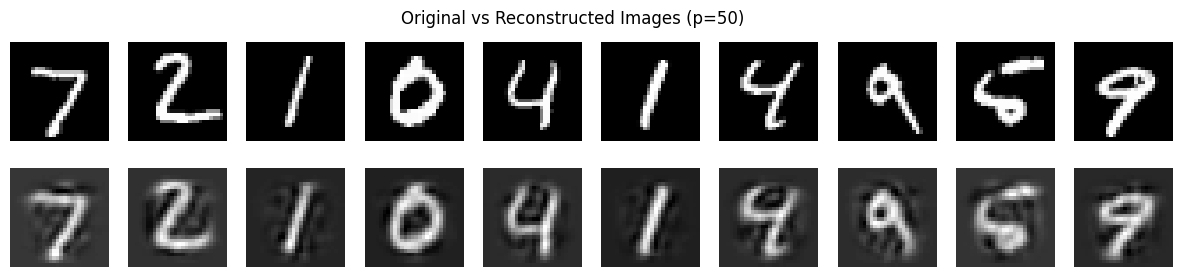

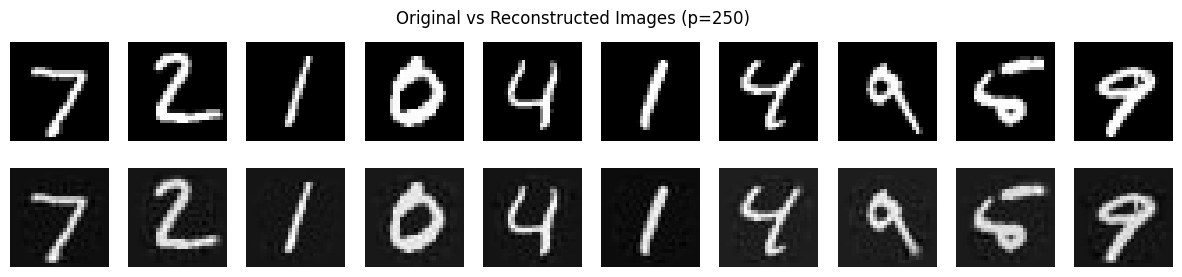

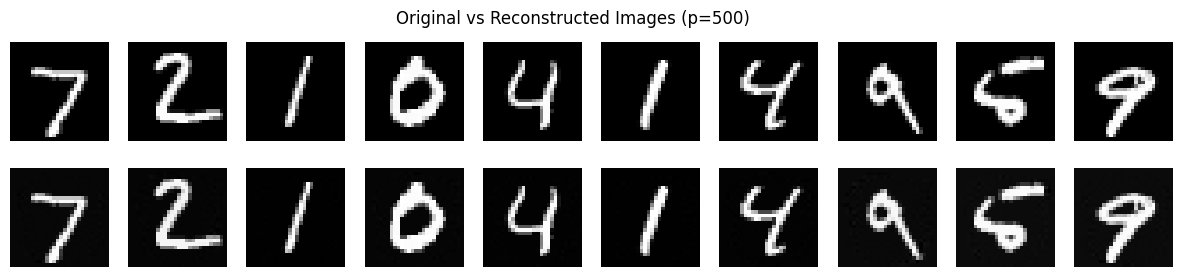

Frobenius Norm Errors: [0.32762882113456726, 0.10058774054050446, 0.01220097579061985]


In [14]:
### Driver code for the previousky defined functions
frobenius_norm = []

# Evaluate for p = 50, 250, 500
for p in [50, 250, 500]:
    error, X_reconstructed = pca_reconstruction_error(X, p, eigvecs)
    frobenius_norm.append(error)

    # Visualize some original and reconstructed images
    fig, axes = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(X_reconstructed[i].reshape(28, 28), cmap='gray')
        axes[1, i].axis('off')
    plt.suptitle(f'Original vs Reconstructed Images (p={p})')
    plt.show()

print(f"Frobenius Norm Errors: {frobenius_norm}")

### c. Noisy Data Generation [1.5 points]

i.   Complete the function `mnist_noised()` to generate noisy versions of the mnist data.

ii.   Visualize the noisy images and compare them with their corresponding original images.

iii.   Plot the cumulative explained variance of the **noisy data** along with the **original data** versus the number of components.

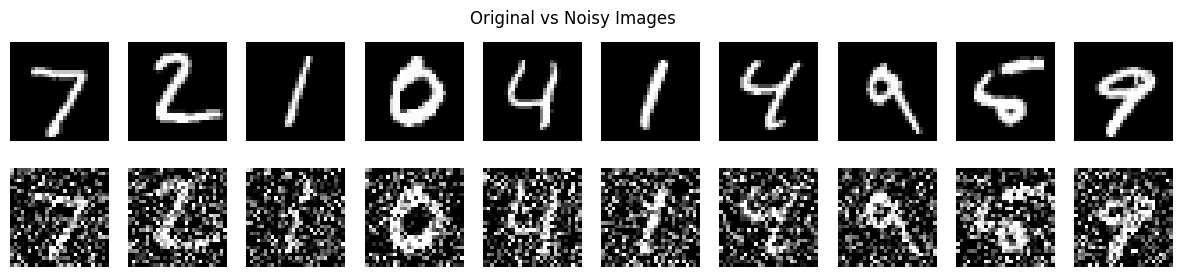

Cumulative Variance Noisy : [0.02347731 0.04201325 0.05698521 0.06981954 0.08212842 0.09253776
 0.10152143 0.10944077 0.1172258  0.12407507 0.1305585  0.13691995
 0.1425025  0.14782454 0.15305468 0.15794303 0.16258909 0.16716453
 0.17149562 0.17563425 0.17971024 0.18363619 0.18748386 0.19120856
 0.19486229 0.19840537 0.20190822 0.20537268 0.20879102 0.21216935
 0.2154835  0.21873866 0.22191921 0.22503714 0.22805445 0.23103833
 0.2339916  0.23690803 0.23978922 0.24263015 0.24544981 0.24824993
 0.25101128 0.25375736 0.25647992 0.25916544 0.2618464  0.26451197
 0.26713046 0.26974428 0.27234244 0.274934   0.2775176  0.2800641
 0.282602   0.28511643 0.28762656 0.29012257 0.29260048 0.2950707
 0.29752764 0.2999703  0.30240896 0.30482677 0.30722317 0.30960822
 0.31198665 0.3143479  0.31669757 0.31904072 0.32137573 0.32369658
 0.3260138  0.32832417 0.3306276  0.33291996 0.33519787 0.3374619
 0.33971924 0.34197256 0.3442211  0.34645945 0.34869242 0.35091817
 0.3531327  0.35533842 0.35753837 0.3

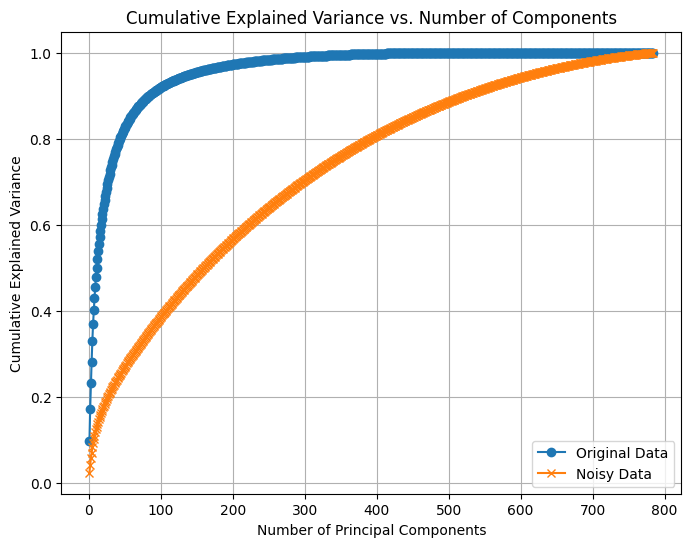

In [ ]:
# Add Gaussian noise
def mnist_noised(X, noise_var=0.25):
    """
    Adds Gaussian noise to the input data `X`.

    Args:
        X (torch.Tensor): A 2D tensor where rows represent samples and columns represent features (e.g., flattened images).
        noise_var (float, optional): The variance of the Gaussian noise to be added. Default is 0.25.

    Returns:
        torch.Tensor: A tensor with Gaussian noise added to each element of `X`..
    """
    noise = torch.randn_like(X) * noise_var ** 0.5
    X_noised = X + noise
    X_noised = torch.clamp(X_noised, 0.0, 1.0)
    return X_noised

# Add Gaussian noise to the data
noisy_data = mnist_noised(X)

# Plot some original and noisy images
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i in range(10):
    axes[0, i].imshow(X[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(noisy_data[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.suptitle('Original vs Noisy Images')
plt.show()

# Compute eigen decomposition for the noisy data
eigvals_noisy, eigvecs_noisy, cumulative_variance_explained_noisy = eigen_decomp(noisy_data)

# Plot the cumulative variance for noisy data and original data
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_explained) + 1), cumulative_variance_explained, label='Original Data', marker='o')
plt.plot(range(1, len(cumulative_variance_explained_noisy) + 1), cumulative_variance_explained_noisy, label='Noisy Data', marker='x')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()


### Answer the below question: [0.25 points]

Q: How do the 2 plots compare? Are they similar?

Space for answer: For‍ th‍e o‍rig‍ina‍l d‍ata‍, t‍he ‍cum‍ula‍tiv‍e e‍xpl‍ain‍ed ‍var‍іan‍ce ‍inc‍rea‍ses‍ sharply ‍wit‍h t‍he ‍ini‍tia‍l c‍omp‍one‍nts‍, s‍hоw‍ing‍ th‍at a s‍mal‍l n‍umb‍er ‍of ‍com‍pon‍ent‍s c‍an ‍cap‍tur‍e t‍hе ‍maj‍ori‍ty ‍of ‍the‍ va‍ria‍nce‍. O‍n t‍he ‍oth‍er ‍han‍d, ‍for‍ th‍е n‍ois‍y d‍ata‍, t‍he ‍exp‍lai‍ned‍ va‍ria‍nce‍ te‍nds‍ to‍ in‍cre‍аse‍ mo‍re ‍slo‍wly‍. N‍ois‍e d‍ist‍rib‍ute‍s v‍ari‍anc‍e a‍cro‍ss ‍mоr‍e c‍omp‍one‍nts‍, s‍o g‍ene‍ral‍ly it ‍req‍uir‍es ‍mor‍e c‍omp‍onе‍nts‍ to‍ re‍ach‍ th‍e s‍ame‍ cu‍mul‍ati‍ve ‍exp‍lai‍ned‍ va‍ria‍ncе‍ as‍ th‍e o‍rig‍ina‍l d‍ata‍. T‍he ‍noi‍sy ‍dat‍a p‍lot‍ st‍art‍s о‍ff ‍les‍s s‍tee‍p a‍nd ‍tak‍es ‍lon‍ger‍ to‍ co‍nve‍rge‍.

### d. Image Denoising [1 point]



i.   Complete the function `pca_reconstruction_noisy()`. It should:
- Add Gaussian noise of a specified variance ($\sigma^{2}$) to the original data.
- Compute the eigen decomposition on the noisy data, retaining only the top `p` principal components.
- Calculate the reconstruction error to quantify the quality of denoising.

ii. Plot the denoised images agianst the noisy data for visual comparison.



In [18]:
def pca_reconstruction_noisy(X, noise_var=0.05, p=100):
    """
    Adds Gaussian noise to input data `X`, performs PCA-based dimensionality reduction,
    and reconstructs the denoised images using the top `p` principal components.

    Args:
        X (torch.Tensor): A 2D tensor where rows represent samples and columns represent features (e.g., flattened images).
        noise_var (float, optional): Variance of the Gaussian noise to be added to `X`. Default is 0.05.
        p (int, optional): Number of principal components to retain for PCA-based reconstruction. Default is 100.

    Returns:
        tuple: A tuple containing:
            - error (float): The normalized reconstruction error after applying PCA to the noisy data.
            - X_reconstructed (torch.Tensor): A 2D tensor of reconstructed data using the top `p` components, representing the denoised images.
    """
    noisy_data = mnist_noised(X, noise_var=noise_var)
    eigvals_noisy, eigvecs_noisy, _ = eigen_decomp(noisy_data)
    error, X_reconstructed = pca_reconstruction_error(noisy_data, p, eigvecs_noisy)

    return error, X_reconstructed

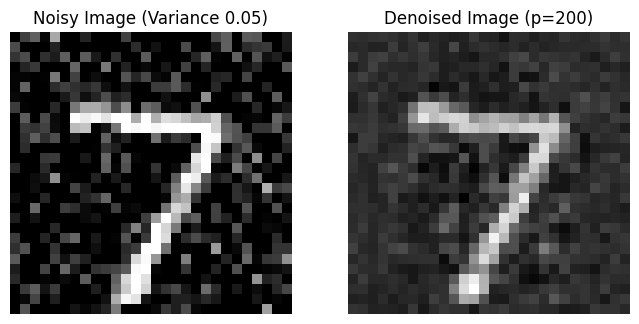

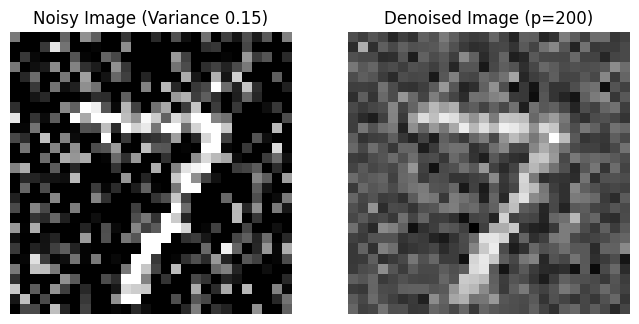

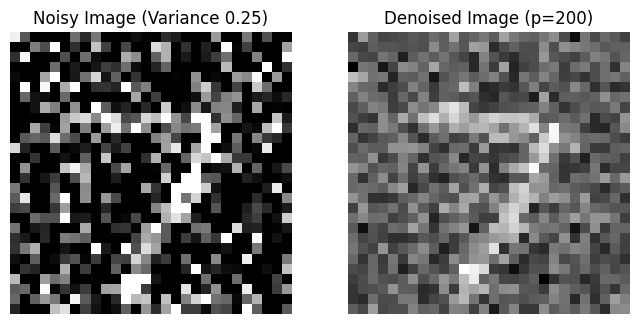

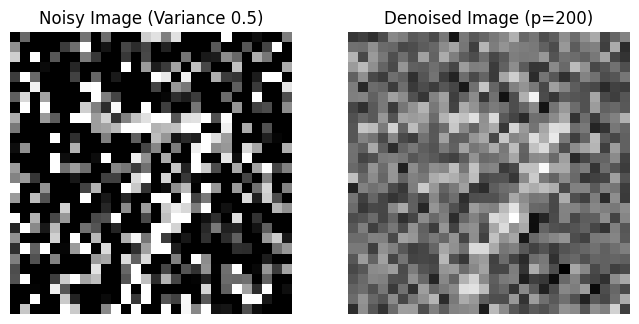

Reconstruction Errors for different noise levels: [0.3306845724582672, 0.45136672258377075, 0.49319908022880554, 0.5235289931297302]


In [ ]:
### Driver code for the previousky defined functions
noise_levels = [0.05, 0.15, 0.25, 0.5]
errors = []

for noise_var in noise_levels:
    error, X_reconstructed = pca_reconstruction_noisy(X, noise_var, p=200)
    errors.append(error)

    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(mnist_noised(X, noise_var=noise_var)[0].reshape(28, 28), cmap='gray')
    axes[0].set_title(f"Noisy Image (Variance {noise_var})")
    axes[0].axis('off')

    axes[1].imshow(X_reconstructed[0].reshape(28, 28), cmap='gray')
    axes[1].set_title(f"Denoised Image (p=200)")
    axes[1].axis('off')

    plt.show()

print(f"Reconstruction Errors for different noise levels: {errors}")